## Socialcops Challenge

#### Working with dataset of each APMC_Commodity inside apmc_commodity folder

##### 1. Import Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

# Data wrangling
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

# Display and Plotting
import matplotlib.pyplot as plt


import os
import random


# pandas config
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set random seed
random.seed(9001)

We have successfully imported all the required packages and libraries. Now, it's time to load the dataset.

##### 2. Load the dataset

Now, I will create a function that can import any CSV file inside the ```apmc_commodity``` folder. 

<b>Remember: </b> The csv filenames are in the format ```apmc_commodity``` i.e. before underscore ( _ ) we are having the commodity name and after underscore ( _ ) we are having the commodity name. So in this way we can import and analyise any APMC and Commodity of our choise.

In [2]:
# Get current working dirctory
def get_cwd():
    return os.getcwd()

data_folder = 'apmc_commodity'

def read_file(filename: str):
    dataset_path = os.path.join(get_cwd(), data_folder, filename)
    return (pd.read_csv(dataset_path))

In [3]:
# list down all the filenames
def files_list():
    files = []
    for file in os.listdir(os.path.join(get_cwd(), data_folder)):
        files.append(file)
    return files

file_names = files_list()    

In [4]:
total_files = len(file_names)
total_files # total number of files inside apmc_commodity folder

3244

In [5]:
first_file_name = file_names[0]
first_file_name

'Aamgaon_paddy-unhusked.csv'

In [6]:
aamgaon_paddy = read_file(first_file_name)
aamgaon_paddy

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,paddy-unhusked,2014,September,2779,1645,1843,1744,2014-09-01,Gondiya,198
1,paddy-unhusked,2014,October,2195,1591,1749,1670,2014-10-01,Gondiya,158
2,paddy-unhusked,2014,November,10153,1438,1577,1507,2014-11-01,Gondiya,139
3,paddy-unhusked,2014,December,14608,1481,1554,1518,2014-12-01,Gondiya,73
4,paddy-unhusked,2015,January,16775,1505,1562,1533,2015-01-01,Gondiya,57
5,paddy-unhusked,2015,February,7674,1481,1530,1505,2015-02-01,Gondiya,49
6,paddy-unhusked,2015,April,2728,1441,1442,1412,2015-04-01,Gondiya,1
7,paddy-unhusked,2015,May,3688,1367,1425,1402,2015-05-01,Gondiya,58
8,paddy-unhusked,2015,June,9312,1348,1369,1339,2015-06-01,Gondiya,21
9,paddy-unhusked,2015,July,5499,1459,1555,1510,2015-07-01,Gondiya,96


##### Function- 1
* <b>read_file(filename): </b>Read the file  

#### 2. EDA

Let's create small functions to analyze each of the attributes of out dataset.

##### 2.1 Remove all the outliners in 'modal_price' from the dataset

In [7]:
def remove_outliners(filename: str):
    apmc_commodity = read_file(filename)
    Q1 = apmc_commodity['modal_price'].quantile(0.25) # First quartile
    Q3 = apmc_commodity['modal_price'].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # Interquartile range
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    data_filter = apmc_commodity[~((apmc_commodity['modal_price'] < lower_threshold) | (apmc_commodity['modal_price'] >
                                                                                       upper_threshold))]
    return data_filter

Function is successfully created. Let's removed all the outliners from the data

In [8]:
random_file_0 = file_names[random.randint(0, len(file_names))]
random_file_0

'Akole_paddy-unhusked.csv'

In [9]:
remove_outliners(random_file_0)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,paddy-unhusked,2014,September,119,1450,1900,1681,2014-09-01,Ahmadnagar,450
1,paddy-unhusked,2014,October,103,1425,1900,1669,2014-10-01,Ahmadnagar,475
2,paddy-unhusked,2014,November,204,1450,1800,1625,2014-11-01,Ahmadnagar,350
3,paddy-unhusked,2014,December,346,1400,1800,1625,2014-12-01,Ahmadnagar,400
4,paddy-unhusked,2015,January,403,1395,1860,1600,2015-01-01,Ahmadnagar,465
6,paddy-unhusked,2015,March,129,1400,1850,1613,2015-03-01,Ahmadnagar,450
7,paddy-unhusked,2015,April,113,1450,1925,1625,2015-04-01,Ahmadnagar,475
8,paddy-unhusked,2015,May,54,1425,1950,1681,2015-05-01,Ahmadnagar,525
9,paddy-unhusked,2015,June,62,1467,2067,1692,2015-06-01,Ahmadnagar,600
10,paddy-unhusked,2015,July,87,1440,1880,1595,2015-07-01,Ahmadnagar,440


##### Function - 2
* <b>remove_outliners(filename): </b> Removed all the outliners in the 'modal_price' from the dataset.

##### 2.2 diff_price

As we have already removed the entities having <b>diff_price</b> less than zero so now only one thing is important to know, <b>weather the diff_price value is 0 (i.e. min_price, max_price and modal_price remain same) for any entity or not?</b>

In [10]:
# function to show entities having diff_price equals to zero
def diff_price_zero(filename: str):
    apmc_comm = remove_outliners(filename)
    result = apmc_comm[apmc_comm['diff_price'] == 0]
    if (len(result) == 0):
        print("No entity having diff_price equals to zero.")
    else:
        return (result)
    

In [11]:
diff_price_zero(first_file_name)

No entity having diff_price equals to zero.


The function is working fine let's check out the files having diff_price equals to zero.

In [12]:
tenth_file_name = file_names[9]
tenth_file_name

'Achalpur_lentil.csv'

In [13]:
diff_price_zero(tenth_file_name)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
3,lentil,2015,September,1,6250,6250,6250,2015-09-01,Amaravathi,0
6,lentil,2016,February,1,4200,4200,4200,2016-02-01,Amaravathi,0
7,lentil,2016,March,1,4200,4200,4200,2016-03-01,Amaravathi,0
9,lentil,2016,June,2,5500,5500,5500,2016-06-01,Amaravathi,0


<b>Conclusion: </b>This shows that the <b>Achalpur</b> APMC and <b>lentil</b> commodity is having <b>min_price, max_price, and modal_price same i.e. no fluctuation in price during 2015 (September) and 2016 (February, March, and June).

Let's check out the whole file of 'Achalpur' APMC and 'lentil' commodity.

In [14]:
remove_outliners(tenth_file_name)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,lentil,2014,December,4,4000,4300,4150,2014-12-01,Amaravathi,300
1,lentil,2015,May,7,5233,5500,5367,2015-05-01,Amaravathi,267
2,lentil,2015,July,7,5213,5463,5282,2015-07-01,Amaravathi,250
3,lentil,2015,September,1,6250,6250,6250,2015-09-01,Amaravathi,0
4,lentil,2015,December,2,5100,5200,5100,2015-12-01,Amaravathi,100
5,lentil,2016,January,1,5100,5200,5125,2016-01-01,Amaravathi,100
6,lentil,2016,February,1,4200,4200,4200,2016-02-01,Amaravathi,0
7,lentil,2016,March,1,4200,4200,4200,2016-03-01,Amaravathi,0
8,lentil,2016,May,2,4600,5200,4875,2016-05-01,Amaravathi,600
9,lentil,2016,June,2,5500,5500,5500,2016-06-01,Amaravathi,0


<b>Conclusion: </b> No fluctuation in price can be seen.

##### Function - 3
* <b>diff_price_zero(filename): </b> check wheather the file conatins the entities having diff_values euals to zero? And if yes, show them. 

#### 2.3 district_name

Let's talk about the next attribute of out dataset. 

Now create a function that tell us the all unique districts in our dataset.

In [15]:
# function tells unique district_names
def uniq_dist(filename: str):
    apmc_comm = remove_outliners(filename)
    return (apmc_comm['district_name'].unique().tolist())

The function is successfully created. Let's test it out.

In [16]:
# lets choose a random file
random_file_1 = file_names[random.randint(0, len(file_names))]
random_file_1

'Kannad_green gram.csv'

In [17]:
# check unique district names in above file
# 'Kannad' -> APMC and 'green' -> commodity
uniq_dist(random_file_1)

['Aurangabad']

We are having only 'Aurangabad' as the district name. Let's check out is this file contains any entity with diff_price equals to zero.

In [18]:
diff_price_zero(random_file_1)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
1,green gram,2014,November,1,6500,6500,6500,2014-11-01,Aurangabad,0
3,green gram,2015,October,1,7500,7500,7500,2015-10-01,Aurangabad,0
4,green gram,2016,August,2,4811,4811,4811,2016-08-01,Aurangabad,0
6,green gram,2016,October,7,4830,4830,4830,2016-10-01,Aurangabad,0


In [19]:
# Check the file
remove_outliners(random_file_1)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,green gram,2014,September,19,5362,6109,5597,2014-09-01,Aurangabad,747
1,green gram,2014,November,1,6500,6500,6500,2014-11-01,Aurangabad,0
2,green gram,2015,August,5,6603,6703,6753,2015-08-01,Aurangabad,100
3,green gram,2015,October,1,7500,7500,7500,2015-10-01,Aurangabad,0
4,green gram,2016,August,2,4811,4811,4811,2016-08-01,Aurangabad,0
5,green gram,2016,September,16,4633,4792,4710,2016-09-01,Aurangabad,159
6,green gram,2016,October,7,4830,4830,4830,2016-10-01,Aurangabad,0


##### Function - 4
* <b>uniq_dist(filename): </b>Tells which unique valies are present inside the 'district_name' attributes.

#### 2.4 min_price and max_price

Let's check out min_price attribute and create a function that can tell us about the entities that are having min_price equals to zero.

In [20]:
# function min_price equals to zero
def min_price_zero(filename: str):
    apmc_comm = remove_outliners(filename)
    result = apmc_comm[apmc_comm['min_price'] == 0]
    if (len(result) == 0):
        print("No entity having min_price equals to zero.")
    else:
        return (result)

The function is successfully created and now let's check out some dataset.

In [21]:
# choose a random file
random_file_2 = file_names[random.randint(0, len(file_names))]
random_file_2

'Jintur_wheat(husked).csv'

In [22]:
# check out file having APMC -> Jintur and Commodity -> wheat(husked)
min_price_zero(random_file_2)

No entity having min_price equals to zero.


In [23]:
# check whole dataset
remove_outliners(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,wheat(husked),2014,September,498,1298,1618,1419,2014-09-01,Parbhani,320
1,wheat(husked),2014,October,232,1387,1632,1504,2014-10-01,Parbhani,245
2,wheat(husked),2014,November,179,1525,1729,1586,2014-11-01,Parbhani,204
3,wheat(husked),2014,December,162,1550,1672,1567,2014-12-01,Parbhani,122
4,wheat(husked),2015,January,205,1579,1666,1606,2015-01-01,Parbhani,87
5,wheat(husked),2015,February,351,1465,1638,1515,2015-02-01,Parbhani,173
6,wheat(husked),2015,March,1118,1371,1741,1500,2015-03-01,Parbhani,370
7,wheat(husked),2015,April,1316,1441,2001,1641,2015-04-01,Parbhani,560
8,wheat(husked),2015,May,656,1448,1861,1594,2015-05-01,Parbhani,413
9,wheat(husked),2015,June,348,1423,1657,1502,2015-06-01,Parbhani,234


Let's create another function that tell us about the entity for which min_price is very low and max_price is high for a partiular dataset.

In [24]:
# entity for which min_price is low in the dataset
def low_min_price(filename: str):
    apmc_comm = remove_outliners(filename)
    low_val = apmc_comm['min_price'].min()
    result = apmc_comm[apmc_comm['min_price'] == low_val]
    return result

# entity for which max_price is high in the dataset
def high_min_price(filename: str):
    apmc_comm = remove_outliners(filename)
    high_val = apmc_comm['max_price'].max()
    result = apmc_comm[apmc_comm['max_price'] == high_val]
    return result

In [25]:
# Test above function
low_min_price(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,wheat(husked),2014,September,498,1298,1618,1419,2014-09-01,Parbhani,320


<b>Conclusion: </b>The commodity is having the low price during the month of September (2014). 

In [26]:
high_min_price(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
25,wheat(husked),2016,October,31,1881,2041,1984,2016-10-01,Parbhani,160


<b>Conclusion: </b>The commodity is having the high price during the month of October (2016).

##### Function - 5:
* <b>min_price_zero(filename): </b>entities for which min_price equals to zero

##### Function - 6:
* <b>low_min_price(filename): </b>time when the price of commodity is least.

##### Function - 7:
* <b>high_max_price(filename): </b>time when the price of commodity is most.

<b>We have created basic functions. Now let's create function that show us more complex results.<b>

#### 3. Highest price fluctuation across different commodities in each relevant season, and year.

Let's create a function that tell us the highest value of a particular commodity goes in different seasons and year.

In [27]:
# Year wise max price
def yearly_max_values(filename: str) -> dict:
    maxprice = []
    apmc_comm = remove_outliners(filename)
    uniq_year = apmc_comm['Year'].unique().tolist()
    for year in uniq_year:
        year_comm = apmc_comm[apmc_comm['Year'] == year]
        max_val = year_comm['max_price'].max()
        maxprice.append((year, max_val))
    return dict(maxprice)

The function is created successfully. Let's test it out.

In [28]:
# choose a random dataset
random_file_3 = file_names[random.randint(0, len(file_names))]
random_file_3

'Anajngaon Surji_pigeon pea (tur).csv'

In [29]:
# APMC -> Anajngaon Surji and Commodity -> pigeon pea (tur)
# check the maximum value of price goes yearly
yearly_max_values(random_file_3)

{2014: 5167, 2015: 10740, 2016: 9050}

<b>Conclusion: The above result shows us that the maximum price of the commodity in 2014 goes to 5167, in 2015 goes to 10740, and in 2016 goes to 9050.</b>

In [30]:
remove_outliners(random_file_3)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,pigeon pea (tur),2014,September,816,4478,4870,4674,2014-09-01,Amaravathi,392
1,pigeon pea (tur),2014,October,741,4810,4980,4880,2014-10-01,Amaravathi,170
2,pigeon pea (tur),2014,November,210,4908,5167,5038,2014-11-01,Amaravathi,259
3,pigeon pea (tur),2014,December,207,4364,4845,4605,2014-12-01,Amaravathi,481
4,pigeon pea (tur),2015,January,12816,4768,5300,5034,2015-01-01,Amaravathi,532
5,pigeon pea (tur),2015,February,27990,4800,5771,5369,2015-02-01,Amaravathi,971
6,pigeon pea (tur),2015,March,9750,5140,5902,5540,2015-03-01,Amaravathi,762
7,pigeon pea (tur),2015,April,6975,5245,6339,5794,2015-04-01,Amaravathi,1094
8,pigeon pea (tur),2015,May,5875,6243,7220,6688,2015-05-01,Amaravathi,977
9,pigeon pea (tur),2015,June,2610,6365,7041,6762,2015-06-01,Amaravathi,676


Verified

In [31]:
# Let's create lists of months in different seasons
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']
winter = ['December', 'January', 'February']

In [32]:
# seasonal max price 
def seasonal_values(filename: str):
    maxprice = []
    apmc_comm = remove_outliners(filename)
    uniq_month = apmc_comm['Month'].unique().tolist()
    for month in uniq_month:
        if month in spring:
            spring_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = spring_max['max_price'].max()
            maxprice.append(('spring', max_val))
        elif month in summer:
            summer_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = summer_max['max_price'].max()
            maxprice.append(('summer', max_val))
        elif month in autumn:
            autumn_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = autumn_max['max_price'].max()
            maxprice.append(('autumn', max_val))
        else:
            winter_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = winter_max['max_price'].max()
            maxprice.append(('winter', max_val))
    return maxprice

In [33]:
def seasonal_max_values(filename: str) -> dict:
    val = seasonal_values(filename)
    d = {}
    for ele in sorted(val, key = lambda x: x[1]):
        d[ele[0]] = ele[1]
    return d
    

The function is created successfully. Let's check it out on random dataset.

In [34]:
random_file_4 = file_names[random.randint(0, len(file_names))]
random_file_4

'Pune-Manjri_other vegetables.csv'

In [35]:
# max price of APMC -> Pune-Manjri and Commodity -> other vegetables seasonally
seasonal_max_values(random_file_4)

{'autumn': 1800, 'summer': 1800}

In [36]:
remove_outliners(random_file_4)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,other vegetables,2015,November,3358,0,1710,90,2015-11-01,Pune,1710
1,other vegetables,2016,July,4786,533,1800,533,2016-07-01,Pune,1267
2,other vegetables,2016,August,4323,1731,1800,1731,2016-08-01,Pune,69
3,other vegetables,2016,September,4685,1800,1800,1800,2016-09-01,Pune,0
4,other vegetables,2016,October,9517,1800,1800,1800,2016-10-01,Pune,0
5,other vegetables,2016,November,14359,1800,1800,1800,2016-11-01,Pune,0


<b>Conclusion: The result shows us that the maximum price of commodity during autumn is 1800, during summer is 1800.</b> 

Now, the function is created that can tell us the maximum price goes across different commodities  in each relevant season, and year.

##### Function - 8
* <b>yearly_max_values(filename): </b>maximum price of a commodity each year.
    
##### Function - 9 
* <b>seasonal_max_values(filename): </b>maximum price of a commodity each season.

#### 4. Seasonality and Trend in modal_price

Let's detect the seasonality and trend in modal_price of different commodities. 

In [37]:
# Identifying trends in modal_price of different commodities
def modal_price_trend(filename: str):
    apmc_comm = remove_outliners(filename)
    apmc_comm.set_index('date', inplace = True)
    modal_pr = apmc_comm[['modal_price']]
    modal_pr.rolling(2).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
   

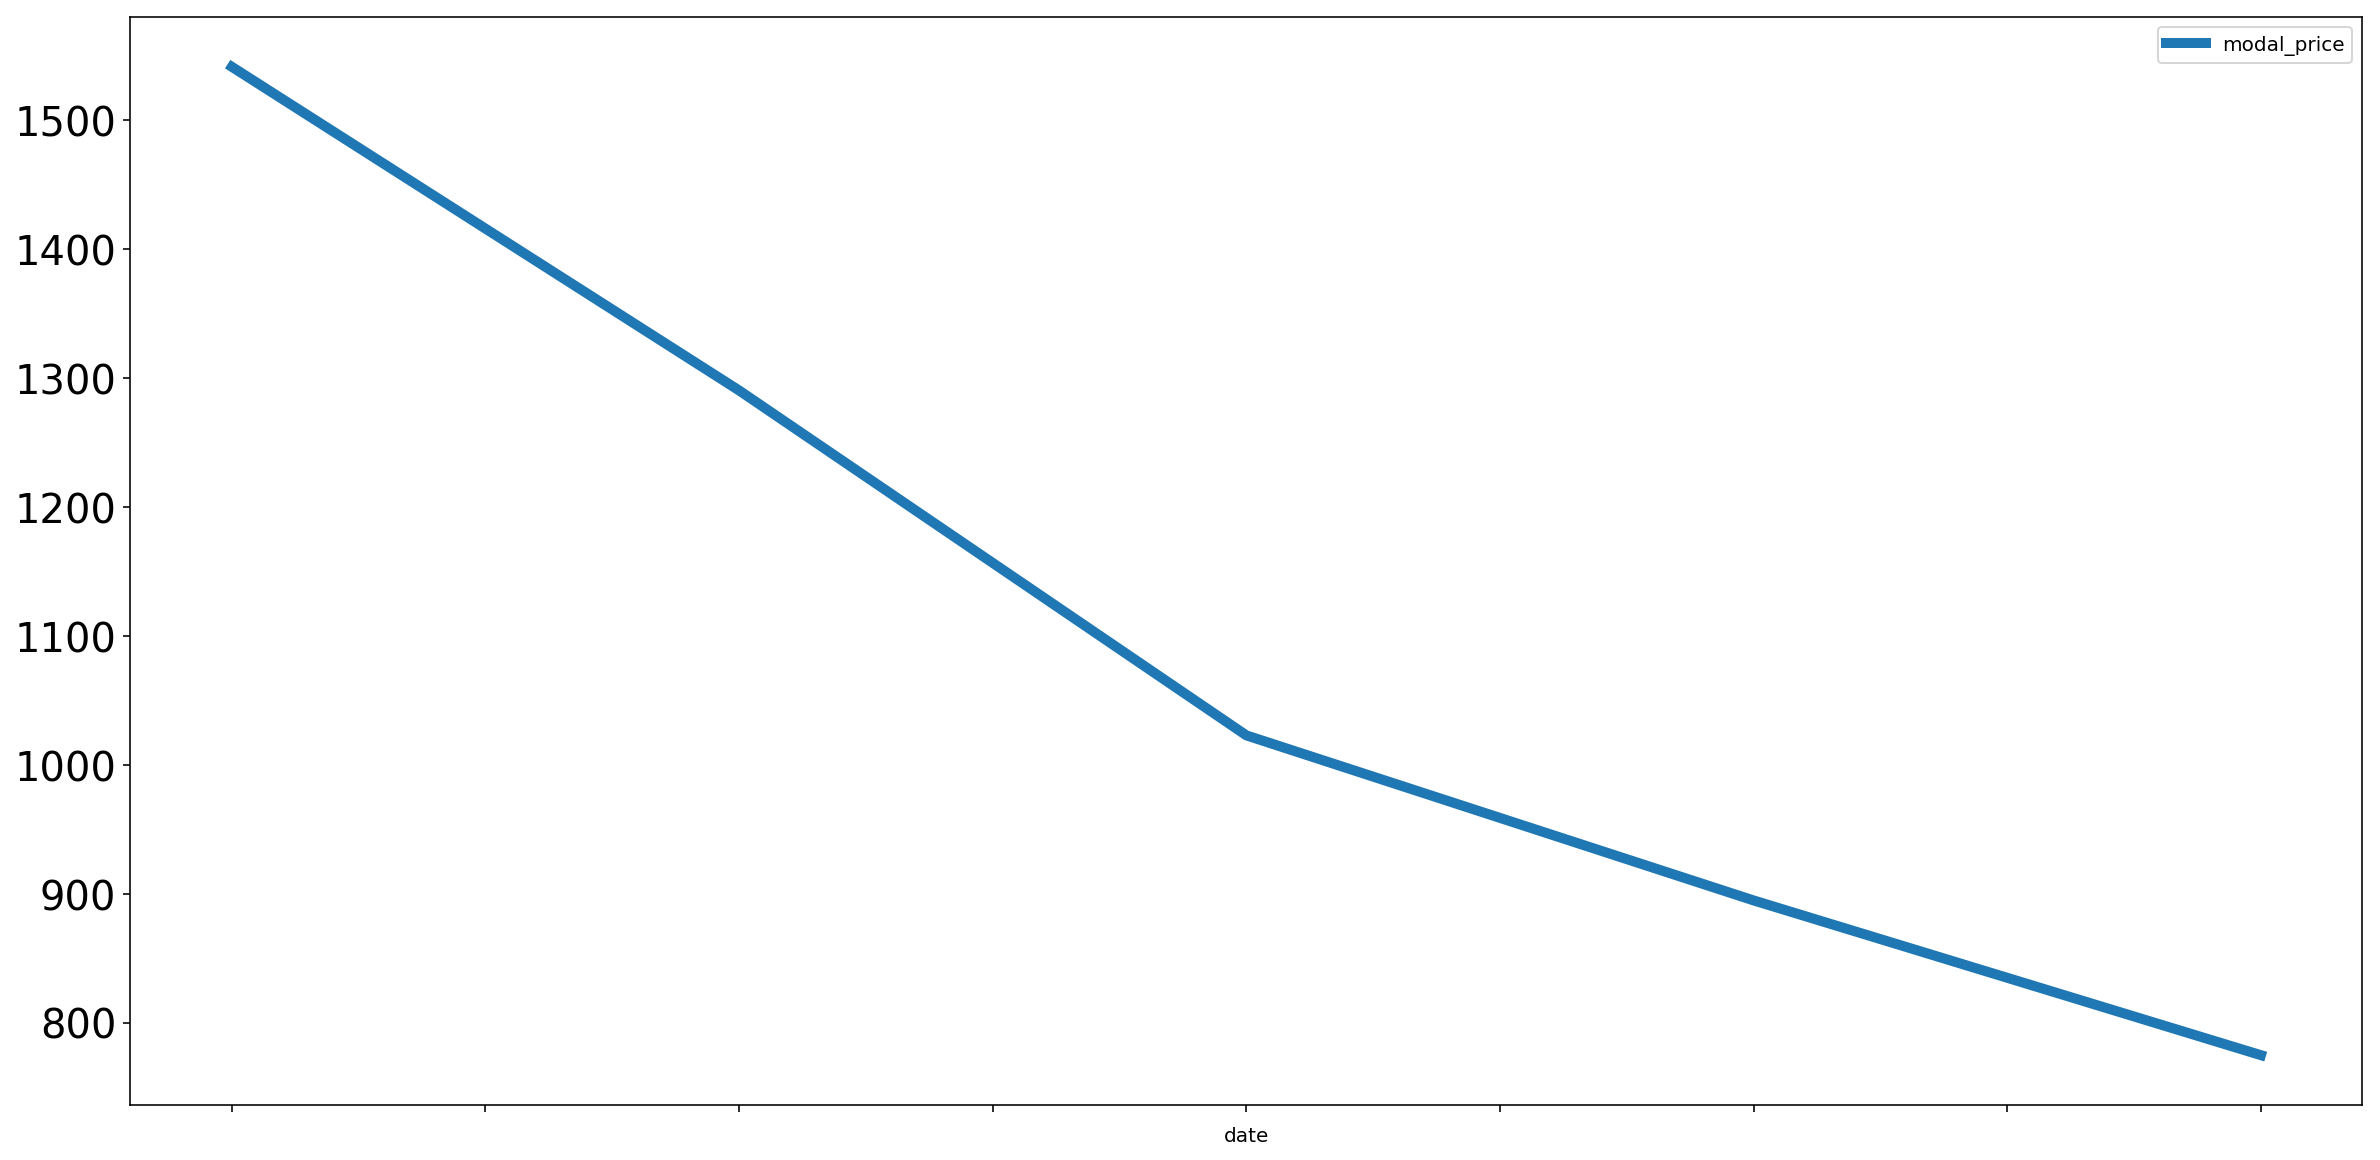

In [38]:
modal_price_trend('Kolhapur_strawberi.csv')

<b>Conclusion: </b>Downward trend can be seen.

In [39]:
def seasonal_decomposed_modal_price(filename: str, freq: int, model_name: str):
    apmc_commodity = remove_outliners(filename)
    apmc_commodity.set_index('date', inplace = True)
    result = seasonal_decompose(apmc_commodity['modal_price'], freq = freq, model = model_name)
    print("Observed:\n ", result.observed)
    print("Trend:\n ", result.trend)
    print("Seasonal:\n ", result.seasonal)
    print("Resid:\n ", result.resid)
    result.plot()
    

Observed:
  date
2015-10-01    1583
2015-11-01    1500
2015-12-01    1081
2016-01-01     965
2016-02-01     825
2016-03-01     725
Name: modal_price, dtype: int64
Trend:
  date
2015-10-01   1583.00000
2015-11-01   1500.00000
2015-12-01   1081.00000
2016-01-01    965.00000
2016-02-01    825.00000
2016-03-01    725.00000
Name: modal_price, dtype: float64
Seasonal:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: modal_price, dtype: float64
Resid:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: modal_price, dtype: float64


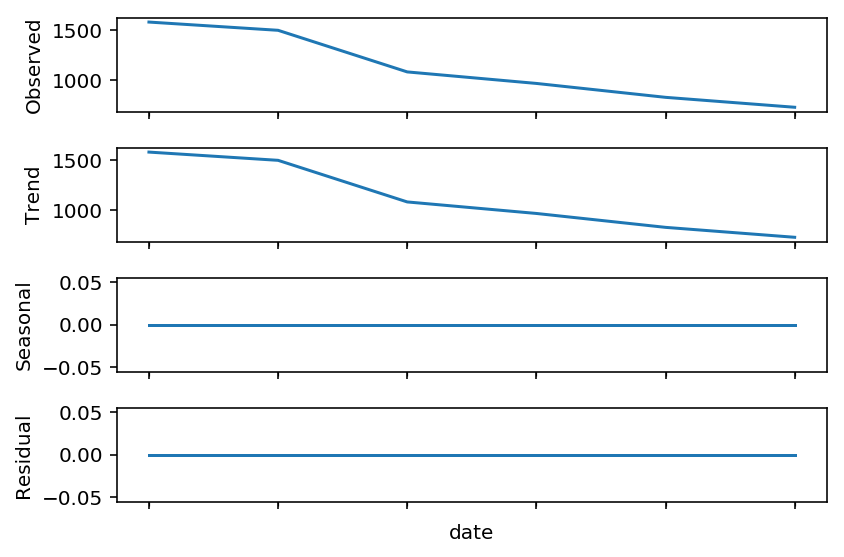

In [40]:
seasonal_decomposed_modal_price('Kolhapur_strawberi.csv', 1, 'additive')

<b>Conclusion: </b>No seasonal effect can be seen in the commodity(strawberi) of 'Kolhapur'(APMC). And a downward trend can be seen.

##### Function - 10
* <b>modal_price_trend(filename): </b>Return a plot to show the trend with rolling average (2) parameter

##### Function - 11
* <b>seasonal_decomposed_modal_price(filename, freq, modal_name): </b>Return a plot and details by doing the seasonal decomposition.

#### 5. Seasonality and Trend in the arrivals_in_qtl:

In [41]:
def seasonal_decomposed_arrivals_in_qtl(filename: str, freq: int, model_name: str):
    apmc_commodity = remove_outliners(filename)
    apmc_commodity.set_index('date', inplace = True)
    result = seasonal_decompose(apmc_commodity['arrivals_in_qtl'], freq = freq, model = model_name)
    print("Observed:\n ", result.observed)
    print("Trend:\n ", result.trend)
    print("Seasonal:\n ", result.seasonal)
    print("Resid:\n ", result.resid)
    result.plot()

Observed:
  date
2015-10-01      53
2015-11-01      24
2015-12-01     315
2016-01-01    1065
2016-02-01     787
2016-03-01      21
Name: arrivals_in_qtl, dtype: int64
Trend:
  date
2015-10-01     53.00000
2015-11-01     24.00000
2015-12-01    315.00000
2016-01-01   1065.00000
2016-02-01    787.00000
2016-03-01     21.00000
Name: arrivals_in_qtl, dtype: float64
Seasonal:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: arrivals_in_qtl, dtype: float64
Resid:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: arrivals_in_qtl, dtype: float64


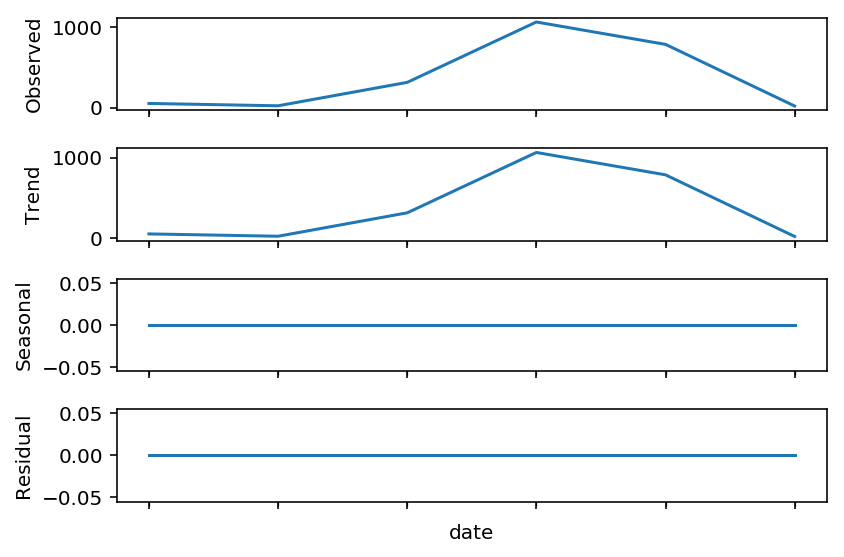

In [42]:
seasonal_decomposed_arrivals_in_qtl('Kolhapur_strawberi.csv', 1, 'additive')

<b>Conclusion: </b>No seasonality can be seen but a downward trend can be seen as time passes.

##### Function - 12:
* <b>seasonal_decomposed_arrivals_in_qtl(filename, freq, model_name): </b>Return importand information and plot to visualise trend and seasonality of a commodity.

#### 6. Generate Clean data

We have successfully created small functions to bring out the useful insights from the data. Now, using these functions we will generate out cleaned data inside the <b>cleaned_data</b> folder.

In [46]:
def filtered_monthly_cmo_dataset():
    folder_path = './cleaned_data/' 
    for file in file_names:
        df = remove_outliners(file)
        try:
            df.to_csv(folder_path + file, sep = ',', encoding = 'utf-8')
        except Exception as e:
            print(e)

In [47]:
filtered_monthly_cmo_dataset()

In [107]:
# path to new cleaned data
def cleaned_files_list():
    files = []
    data_folder = 'cleaned_data'
    for file in os.listdir(os.path.join(get_cwd(), data_folder)):
        files.append(file)
    return files
cleaned_files = cleaned_files_list()

In [108]:
def apmc_comm_max_value():
    apmc = []
    commodity = []
    for file in cleaned_files:
        names = file.split('_')
        apmc.append(names[0])
        commodity.append(names[1][:-4])
            
    df = pd.DataFrame({'APMC': apmc, 'Commodity': commodity})
    
    return df

def yearly_2014_max_value():
    year_2014 = []
    for file in cleaned_files:
        d  = yearly_max_values(file)
        keys = d.keys()
        if (2014 not in keys):
            year_2014.append(0)
        elif (2014 in keys):
            year_2014.append(d[2014])
            
    return year_2014

def yearly_2015_max_value():
    year_2015 = []
    for file in cleaned_files:
        d = yearly_max_values(file)
        keys = d.keys()
        if (2015 not in keys):
            year_2015.append(0)
        elif (2015 in keys):
            year_2015.append(d[2015])
    return year_2015

def yearly_2016_max_value():
    year_2016 = []
    for file in cleaned_files:
        d = yearly_max_values(file)
        keys = d.keys()
        if (2016 not in keys):
            year_2016.append(0)
        elif (2016 in keys):
            year_2016.append(d[2016])
    return year_2016

In [109]:
apmc_comms = apmc_comm_max_value()
year_2014_max = yearly_2014_max_value()
year_2015_max = yearly_2015_max_value()
year_2016_max = yearly_2016_max_value()

In [110]:
apmc_comms['2014'] = year_2014_max
apmc_comms['2015'] = year_2015_max
apmc_comms['2016'] = year_2015_max

In [111]:
def save_yearly_max_val():
    folder_path = './cleaned_data/'
    file_name = 'yearly_maximum_price_of_APMC_Commidity.csv'
    apmc_comms.to_csv(folder_path + file_name, sep = ',', encoding = 'utf-8' )

In [112]:
save_yearly_max_val()

In [114]:
yearly_max_values('Amarawati-Fruit And Vegetables_apple.csv')

{2016: 13364}

####  7. Overview of the created functions:

| Functions | Detail |
| --------- | ------ |
| <b>read_file(filename: str)</b> | Read the input file and return data in form of dataframe |
| <b>remove_outliners(filename: str)</b> | Read the input file and remove the outliners in 'modal_price' attribute |
| <b>diff_price_zero(filename: str)</b> | Read the filename and retun details about samples having 'diff_price' equals to zero |
| <b>uniq_dist(filename: str)</b> | Read the filename and return the list of unique district names |
| <b>min_price_zero(filename: str)</b> | Read the filename and return details about the samples having minimum price equals to zero |
| <b>low_min_price(filename: str)</b> | Read the filename and return the details about the time when price of the comodity is least |
| <b>high_max_price(filename: str)</b> | Read the filename and returnthe details about the time when price of the commodity is most |
| <b>yearly_max_values(filename: str)</b> | Read the filename and return the dictionay shows max price of the commodity each year |
| <b>seasonal_max_values(filename: str)</b> | Read the filename and return a dictionary shows max price of the commodity each season |
| <b>modal_price_trend(filename: str)</b> | Read the filename and return the trend in modal price of the commodity by rolling avery of two months of window size |
| <b>seasonal_decomposed_modal_price(filename: str, freq: int, modal_name: str)</b> | Read the filename, frequency_interval, and modal_type(additive/multiplicative) and return the necessary details as well as plot about the trend, seasonality and the residual of a particular commodity modal_price |
| <b>seasonal_decomposed_arrivals_in_qtl(filename: str, freq: int, model_name: str)</b> | Read the filename, frequency_interval, and modal_type(additive/multiplicative) and return the necessary details as well as plot about the trend, seasonality and the residual of a particular commodity arrival_in_qtl |